# Part I - (Dataset Exploration Title)
## by (Brian Njoroge Kinyanjui)

## Introduction

## Preliminary Wrangling


In [59]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [60]:
# Loading dataset into the Pandas Dataframe
loan_data_df = pd.read_csv('prosperLoanData.csv')
#pd.set_option('display.float_format', lambda x: '%0.9f' % x)
pd.reset_option('display.float_format')
loan_data_df.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [61]:
# Checking the summary of the dataframe.
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Data Assessment and Cleaning
We need to streamline our dataset inorder to be able to create our analysis and visualizations. We'll need to:
 1. Create a new analysis dataframe with particular column data for our analysis and visualization.

 2. Clean the new dataframe:
     - Handling missing data
     - Sorting duplicate values
     - Sorting incorrect datatypes. For Example LoanOriginationDate is an object(string) type instead of datetime type.
 3. Remap our ListingCategory column data from its current numeric data to its corresponding partner. For example:
    - The category of the listing that the borrower selected when posting their listing:
      > 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
 4. Create a categoty type for our ordinal data.
 5. Remap the BorrowerState abbreviation to the state full names.

=============================================================================================================================

#### The original dataframe has 81 columns and 113,937 rows. To simplify my analysis i will concetrate on selecting columns that are related to our exploration of the loan. The columns are features of interest for our analysis. The columns indicate the duration of the loan, as well as other characteristics from the borrowers

In [62]:
loan_analysis_df = loan_data_df[['LoanStatus', 'EmploymentStatus', 'StatedMonthlyIncome','LoanOriginalAmount', 'Term', 'BorrowerState', 'Occupation', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'CurrentCreditLines', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationDate', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatusDuration', 'OpenCreditLines', 'TotalCreditLinespast7years', 'MonthlyLoanPayment']]

In [63]:
# Checking the summary of our dataframe as well as there datatypes.
loan_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanStatus                  113937 non-null  object 
 1   EmploymentStatus            111682 non-null  object 
 2   StatedMonthlyIncome         113937 non-null  float64
 3   LoanOriginalAmount          113937 non-null  int64  
 4   Term                        113937 non-null  int64  
 5   BorrowerState               108422 non-null  object 
 6   Occupation                  110349 non-null  object 
 7   IsBorrowerHomeowner         113937 non-null  bool   
 8   ListingCategory (numeric)   113937 non-null  int64  
 9   CurrentCreditLines          106333 non-null  float64
 10  DebtToIncomeRatio           105383 non-null  float64
 11  IncomeRange                 113937 non-null  object 
 12  IncomeVerifiable            113937 non-null  bool   
 13  LoanOriginatio

In [64]:
# Extracting the sum of missing data and values for each column.
loan_analysis_df.isnull().sum()

LoanStatus                        0
EmploymentStatus               2255
StatedMonthlyIncome               0
LoanOriginalAmount                0
Term                              0
BorrowerState                  5515
Occupation                     3588
IsBorrowerHomeowner               0
ListingCategory (numeric)         0
CurrentCreditLines             7604
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
LoanOriginationDate               0
BorrowerAPR                      25
ProsperRating (Alpha)         29084
EmploymentStatusDuration       7625
OpenCreditLines                7604
TotalCreditLinespast7years      697
MonthlyLoanPayment                0
dtype: int64

In [65]:
# Checking percentage of missing values in our columns
# Determining the percentage of the missing values in our columns
# If percentage is significantly lower within an acceptable percentage range then we can drop the missing values
missing_columns = []
for i, col in enumerate(loan_analysis_df.columns):
    missing = (loan_analysis_df[col].isnull().sum()/loan_analysis_df.shape[0]) * 100
    if (missing > 0).all():
        missing_columns.append(col)
    print(f'{i+1}. {col} = {(loan_analysis_df[col].isnull().sum()/loan_analysis_df.shape[0]) * 100}%')

1. LoanStatus = 0.0%
2. EmploymentStatus = 1.9791639239228696%
3. StatedMonthlyIncome = 0.0%
4. LoanOriginalAmount = 0.0%
5. Term = 0.0%
6. BorrowerState = 4.840394252964358%
7. Occupation = 3.149108717975723%
8. IsBorrowerHomeowner = 0.0%
9. ListingCategory (numeric) = 0.0%
10. CurrentCreditLines = 6.673863626390022%
11. DebtToIncomeRatio = 7.507657740681253%
12. IncomeRange = 0.0%
13. IncomeVerifiable = 0.0%
14. LoanOriginationDate = 0.0%
15. BorrowerAPR = 0.02194195037608503%
16. ProsperRating (Alpha) = 25.52638738952228%
17. EmploymentStatusDuration = 6.692294864705935%
18. OpenCreditLines = 6.673863626390022%
19. TotalCreditLinespast7years = 0.6117415764852506%
20. MonthlyLoanPayment = 0.0%


In [66]:
# Checking for duplicate values
sum(loan_analysis_df.duplicated())

871

In [67]:
loan_analysis_df=loan_analysis_df[loan_analysis_df['ProsperRating (Alpha)'].notnull()]

In [68]:
# The DebtToIncomeRatio and Occupation column play an important role in our dataset for our analysis.
# We'll handle the missing values here by using the mean function in pandas and the fillna function.
# The fillna will fill the missing data with the mean or unknown as per the concerned columns.
loan_analysis_df['DebtToIncomeRatio'] = loan_analysis_df['DebtToIncomeRatio'].fillna(loan_analysis_df['DebtToIncomeRatio'].mean())

In [69]:
loan_analysis_df['Occupation'] = loan_analysis_df['Occupation'].fillna('Unknown')

In [70]:
loan_analysis_df.isnull().sum()

LoanStatus                     0
EmploymentStatus               0
StatedMonthlyIncome            0
LoanOriginalAmount             0
Term                           0
BorrowerState                  0
Occupation                     0
IsBorrowerHomeowner            0
ListingCategory (numeric)      0
CurrentCreditLines             0
DebtToIncomeRatio              0
IncomeRange                    0
IncomeVerifiable               0
LoanOriginationDate            0
BorrowerAPR                    0
ProsperRating (Alpha)          0
EmploymentStatusDuration      19
OpenCreditLines                0
TotalCreditLinespast7years     0
MonthlyLoanPayment             0
dtype: int64

In [71]:
# Dropping missing values
loan_analysis_df = loan_analysis_df.dropna()

In [72]:
# Checking for missing data after dropping
loan_analysis_df.isnull().any().sum()

0

In [73]:
# Changing LoanOriginationDate from string object to datetime object.
loan_analysis_df['LoanOriginationDate'] = pd.to_datetime(loan_analysis_df['LoanOriginationDate'])

In [74]:
# Checking LoanOriginationDate data type change string objec to datetime.
loan_analysis_df.LoanOriginationDate.info()

<class 'pandas.core.series.Series'>
Int64Index: 84834 entries, 1 to 113936
Series name: LoanOriginationDate
Non-Null Count  Dtype         
--------------  -----         
84834 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


#### Checking for the unique values present in our data frame.
This is should help us form an opinion which dataset values are going to be changed to a categorical type. A categorical variable takes on a limited, and usually fixed, number of possible values.

In [75]:
loan_analysis_df.nunique()

LoanStatus                       11
EmploymentStatus                  7
StatedMonthlyIncome            9445
LoanOriginalAmount             1934
Term                              3
BorrowerState                    48
Occupation                       68
IsBorrowerHomeowner               2
ListingCategory (numeric)        20
CurrentCreditLines               51
DebtToIncomeRatio               260
IncomeRange                       7
IncomeVerifiable                  2
LoanOriginationDate            1165
BorrowerAPR                    2329
ProsperRating (Alpha)             7
EmploymentStatusDuration        603
OpenCreditLines                  50
TotalCreditLinespast7years      112
MonthlyLoanPayment            15184
dtype: int64

In [76]:
loan_analysis_df.Occupation.unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Unknown', 'Teacher', 'Clergy', 'Attorney',
       'Nurse (RN)', 'Accountant/CPA', 'Analyst', 'Investor',
       'Flight Attendant', 'Nurse (LPN)', 'Military Officer',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Reli

In [77]:
loan_analysis_df.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [78]:
loan_analysis_df.IncomeRange.value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [79]:
loan_analysis_df.BorrowerState.value_counts()

CA    10760
NY     5844
TX     5634
FL     5405
IL     4260
OH     3373
GA     3345
VA     2779
NJ     2722
PA     2677
MI     2621
NC     2438
MD     2241
WA     2153
MA     1831
MO     1792
CO     1729
MN     1715
IN     1652
TN     1538
WI     1521
CT     1492
AZ     1357
OR     1214
AL     1187
NV     1022
SC      994
KY      888
KS      854
LA      841
AR      769
OK      732
MS      674
NE      555
UT      522
NH      443
RI      409
ID      403
HI      342
NM      331
DC      328
WV      310
DE      267
MT      220
SD      189
VT      171
AK      167
WY      123
Name: BorrowerState, dtype: int64

In [80]:
# Converting string object to ordered categorical types.
# convert ProsperRating (Alpha), EmploymenStatus, BorrowerState, IncomeRange, Occupation into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E', 'HR'],

                     'EmploymentStatus': ['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
                                          'Retired', 'Part-time'],

                    'BorrowerState' : ['CA', 'NY', 'TX', 'FL', 'IL', 'OH', 'GA', 'VA', 'NJ', 'PA', 'MI', 'NC', 'MD',
                                       'WA', 'MA', 'MO', 'CO', 'MN', 'IN', 'TN', 'WI', 'CT', 'AZ', 'OR', 'AL', 'NV',
                                       'SC', 'KY', 'KS', 'LA', 'AR', 'OK', 'MS', 'NE', 'UT', 'NH', 'RI', 'ID', 'HI',
                                       'NM', 'DC', 'WV', 'DE', 'MT', 'SD', 'VT', 'AK', 'WY'],

                    'IncomeRange' : ['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999', '$1-24,999',
                                     'Not employed', '$0']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_analysis_df[var] = loan_analysis_df[var].astype(ordered_var)

#### The ListingCategory data structure from the column

In [81]:
ListingCategory_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business',
                        4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption',
                        9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                        13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
                        17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loan_analysis_df['ListingCategory'] = loan_analysis_df['ListingCategory (numeric)'].map(ListingCategory_dict)
loan_analysis_df.drop(['ListingCategory (numeric)'], axis = 1, inplace = True)

In [82]:
BorrowerState_dict = {'CA' : 'California', 'NY' : 'New York', 'TX' : 'Texas', 'FL' : 'Florida', 'IL' : 'Illinois',
                      'OH' : 'Ohio', 'GA' : 'Georgia', 'VA' : 'Virginia', 'NJ' : 'New Jersey', 'PA' : 'Pennsylvania',
                      'MI' : 'Michigan', 'NC' : 'North Carolina', 'MD' : 'Maryland', 'WA' : 'Washington',
                      'MA' : 'Massachusetts', 'MO' : 'Missouri', 'CO' : 'Colorado', 'MN' : 'Minnesota',
                      'IN' : 'Indiana', 'TN' : 'Tennessee', 'WI' : 'Wisconsin', 'CT' : 'Connecticut', 'AZ' : 'Arizona',
                      'OR' : 'Oregon', 'AL' : 'Alabama', 'NV' : 'Nevada', 'SC' : 'South Carolina', 'KY' : 'Kentucky',
                      'KS' : 'Kansas', 'LA' : 'Louisiana', 'AR' : 'Arkansas', 'OK' : 'Oklahoma', 'MS' : 'Mississippi',
                      'NE' : 'Nebraska', 'UT' : 'Utah', 'NH' : 'New Hampshire', 'RI' : 'Rhode Island', 'ID' : 'Idaho',
                      'HI' : 'Hawaii', 'NM' : 'New Mexico', 'DC' : 'Washington, D.C.', 'WV' : 'West Virginia',
                      'DE' : 'Delaware', 'MT' : 'Montana', 'SD' : 'South Dakota', 'VT' : 'Vermont', 'AK' : 'Alaska',
                      'WY' : 'Wyoming'}
loan_analysis_df['BorrowerState_Alpha'] = loan_analysis_df['BorrowerState'].map(BorrowerState_dict)
loan_analysis_df.drop(['BorrowerState'], axis = 1, inplace = True)

In [83]:
loan_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanStatus                  84834 non-null  object        
 1   EmploymentStatus            84834 non-null  category      
 2   StatedMonthlyIncome         84834 non-null  float64       
 3   LoanOriginalAmount          84834 non-null  int64         
 4   Term                        84834 non-null  int64         
 5   Occupation                  84834 non-null  object        
 6   IsBorrowerHomeowner         84834 non-null  bool          
 7   CurrentCreditLines          84834 non-null  float64       
 8   DebtToIncomeRatio           84834 non-null  float64       
 9   IncomeRange                 84834 non-null  category      
 10  IncomeVerifiable            84834 non-null  bool          
 11  LoanOriginationDate         84834 non-null  datetime6

In [84]:
loan_analysis_df.ListingCategory.unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

In [85]:
loan_analysis_df.BorrowerState_Alpha.value_counts()

California          10760
New York             5844
Texas                5634
Florida              5405
Illinois             4260
Ohio                 3373
Georgia              3345
Virginia             2779
New Jersey           2722
Pennsylvania         2677
Michigan             2621
North Carolina       2438
Maryland             2241
Washington           2153
Massachusetts        1831
Missouri             1792
Colorado             1729
Minnesota            1715
Indiana              1652
Tennessee            1538
Wisconsin            1521
Connecticut          1492
Arizona              1357
Oregon               1214
Alabama              1187
Nevada               1022
South Carolina        994
Kentucky              888
Kansas                854
Louisiana             841
Arkansas              769
Oklahoma              732
Mississippi           674
Nebraska              555
Utah                  522
New Hampshire         443
Rhode Island          409
Idaho                 403
Hawaii      

In [86]:
# Checking the summary of our dataframe as well as the datatype changes.
loan_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanStatus                  84834 non-null  object        
 1   EmploymentStatus            84834 non-null  category      
 2   StatedMonthlyIncome         84834 non-null  float64       
 3   LoanOriginalAmount          84834 non-null  int64         
 4   Term                        84834 non-null  int64         
 5   Occupation                  84834 non-null  object        
 6   IsBorrowerHomeowner         84834 non-null  bool          
 7   CurrentCreditLines          84834 non-null  float64       
 8   DebtToIncomeRatio           84834 non-null  float64       
 9   IncomeRange                 84834 non-null  category      
 10  IncomeVerifiable            84834 non-null  bool          
 11  LoanOriginationDate         84834 non-null  datetime6

In [87]:
loan_analysis_df.describe()

StatedMonthlyIncome  LoanOriginalAmount          Term  \
count         8.483400e+04        84834.000000  84834.000000   
mean          5.931349e+03         9083.936606     42.487022   
std           8.240672e+03         6287.680594     11.640977   
min           0.000000e+00         1000.000000     12.000000   
25%           3.438667e+03         4000.000000     36.000000   
50%           5.000000e+03         7500.000000     36.000000   
75%           7.083333e+03        13500.000000     60.000000   
max           1.750003e+06        35000.000000     60.000000   

       CurrentCreditLines  DebtToIncomeRatio   BorrowerAPR  \
count        84834.000000       84834.000000  84834.000000   
mean            10.507862           0.258740      0.226655   
std              5.317196           0.304359      0.079917   
min              0.000000           0.000000      0.045830   
25%              7.000000           0.160000      0.163280   
50%             10.000000           0.240000      0.219450   
75%             13.000000           0.310000      0.292540   
max             59.000000          10.010000      0.423950   

       EmploymentStatusDuration  OpenCreditLines  TotalCreditLinespast7years  \
count              84834.000000     84834.000000                84834.000000   
mean                 103.055320         9.528515                   27.657225   
std                   97.078884         4.931676                   13.265802   
min                    0.000000         0.000000                    2.000000   
25%                   30.000000         6.000000                   18.000000   
50%                   74.000000         9.000000                   26.000000   
75%                  148.000000        12.000000                   35.000000   
max                  755.000000        54.000000                  125.000000   

       MonthlyLoanPayment  
count        84834.000000  
mean           291.944727  
std            186.676629  
min              0.000000  
25%            157.330000  
50%            251.940000  
75%            388.350000  
max           2251.510000

In [88]:
loan_analysis_df.sample(50)

LoanStatus EmploymentStatus  StatedMonthlyIncome  LoanOriginalAmount  \
51284    Completed         Employed          7000.000000                4000   
75179      Current        Full-time          8333.333333               15000   
36040      Current         Employed          4750.000000               10000   
31070      Current         Employed          4583.333333               15000   
109813  Chargedoff         Employed          7916.666667                7000   
34777    Completed         Employed          6250.000000                3000   
58145      Current            Other          2250.000000                4000   
109230     Current         Employed          7375.000000                9700   
3848       Current         Employed          4583.333333                5000   
75267      Current         Employed         10833.333333               15000   
23328      Current         Employed          7083.333333               25000   
90955      Current         Employed          3750.000000               10000   
44682      Current         Employed          2592.500000               10000   
89972   Chargedoff         Employed          5000.000000                2000   
49041   Chargedoff    Self-employed          2000.000000                7500   
98402      Current         Employed          7083.333333                8000   
78336    Completed        Part-time          1464.666667                1100   
104182     Current         Employed          1666.666667                4000   
7751       Current         Employed          5069.666667                9000   
60255      Current         Employed          2166.666667                3000   
27563    Completed         Employed          4166.666667                6000   
89320   Chargedoff         Employed          3525.000000               11500   
105505     Current         Employed         10000.000000               12000   
107445     Current         Employed          2491.666667                2500   
9496     Completed         Employed         17500.000000                7500   
11568      Current         Employed          5750.000000               11000   
109379     Current         Employed          2666.666667                6500   
72738      Current         Employed         10343.333333               15000   
101925  Chargedoff         Employed          4333.333333               10000   
94869   Chargedoff         Employed          8933.333333               10000   
92835      Current         Employed          4000.000000                4000   
28053      Current         Employed          4583.333333                8000   
60568   Chargedoff         Employed          4666.666667               10000   
104855   Defaulted         Employed          4166.666667                4000   
74261      Current         Employed          3523.833333               10000   
76061      Current         Employed         16666.666667               23750   
112237     Current         Employed         11833.333333               20000   
74402      Current         Employed          3379.333333                4000   
104327     Current         Employed          5416.666667               13500   
82247      Current         Employed          3750.000000                8000   
82372    Completed    Self-employed          6666.666667                3000   
78919      Current     Not employed             0.000000                4000   
7864       Current         Employed          9166.666667               15000   
59414      Current         Employed          4500.000000                2500   
74773      Current         Employed          4500.000000               10000   
98069      Current         Employed          3333.333333               10000   
62262    Completed         Employed          5833.333333                6500   
60811      Current         Employed          5250.000000                4000   
100383     Current         Employed          9583.333333                5000   
26420   

### What is the structure of your dataset?

> Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount,
 > borrower rate (or interest rate), current loan status, borrower income, and many others. See this [`data dictionary`](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) to understand the dataset's variables.

### What is/are the main feature(s) of interest in your dataset?
> This is an internal data analysis for management on propser loans book. The purpose is to get insights on trends
> concerning Borrower type, purpose of the loan, employment status, Borrower occupation, income range et cetera.
> There are some features worth looking into, such as:
    >  - Which loans do borrowers usually take out from Prosper?
    >  - Which category of listing takes the most loans and for what purpose?
    >  - Are loans depended on level of employment status?
    > - curious if income range affects loan term for a given out loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> StatedMonthlyIncome, EmploymentStatus, Loan Original Amount, IsBorrowerHomeowner , IncomeRange will have
    effects on the LoanStatus and also on the BorrowerAPR.

===============================================================================================================================

## Univariate Exploration


### 1. Exploration of Loan Status Data

In [89]:
loan_analysis_df['LoanStatus'].value_counts()

Current                   56566
Completed                 19657
Chargedoff                 5334
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

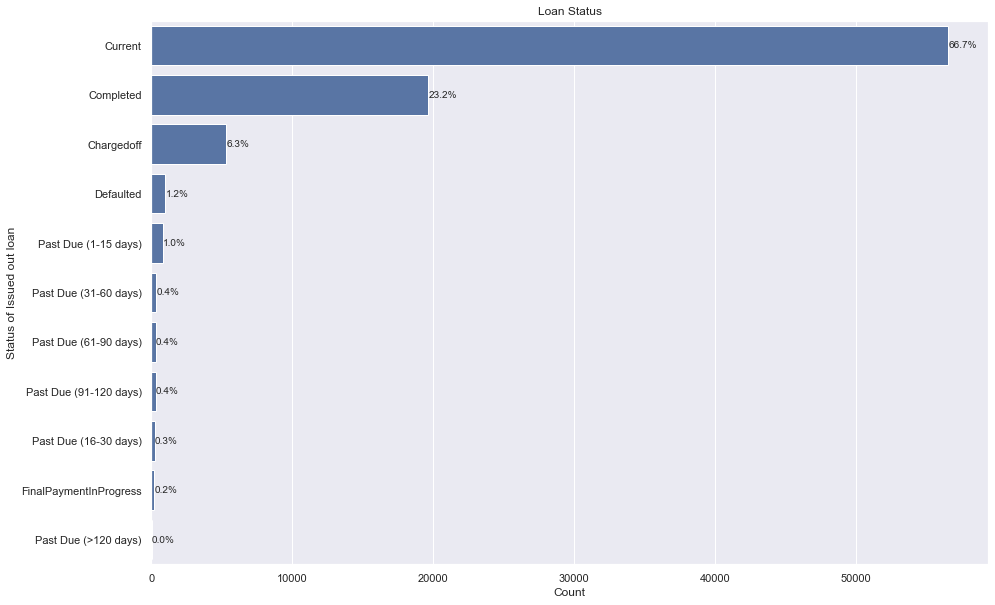

In [90]:
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]
status_order = loan_analysis_df['LoanStatus'].value_counts().index
sb.countplot(data=loan_analysis_df, y='LoanStatus', color=base_color, order=status_order);

# Returns the sum of all not-null values in `LoanStatus` column
loan_count = loan_analysis_df['LoanStatus'].value_counts().sum()

# Count the frequency of unique values in the `LoanStatus` column of loan_analysis_df dataframe.
max_loan_count = loan_analysis_df['LoanStatus'].value_counts()

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_loan_prop = max_loan_count/loan_count

# Logic to print the proportion text on the bars
for i in range(max_loan_count.shape[0]):
    count = max_loan_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count/loan_count)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va='center')

plt.xlabel('Count');
plt.ylabel('Status of Issued out loan');
plt.title('Loan Status');

#### Note:
It can be observed that most loans are current at 66.7%, followed by Completed loans at 23.2%. To put it simply, 66.7% of the loans are being serviced by Prosper Borrowers, 23.2% of the loans have been completed and no longer
being serviced; thus new loans can be issued out to this existing Borrowers. However 2.7% of the loans are past there due date while 1.2% of the Borrowers have defaulted on there loan payments.

================================================================================================================================

#### 2. Income range of Borrowers

In [91]:
loan_analysis_df['IncomeRange'].value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

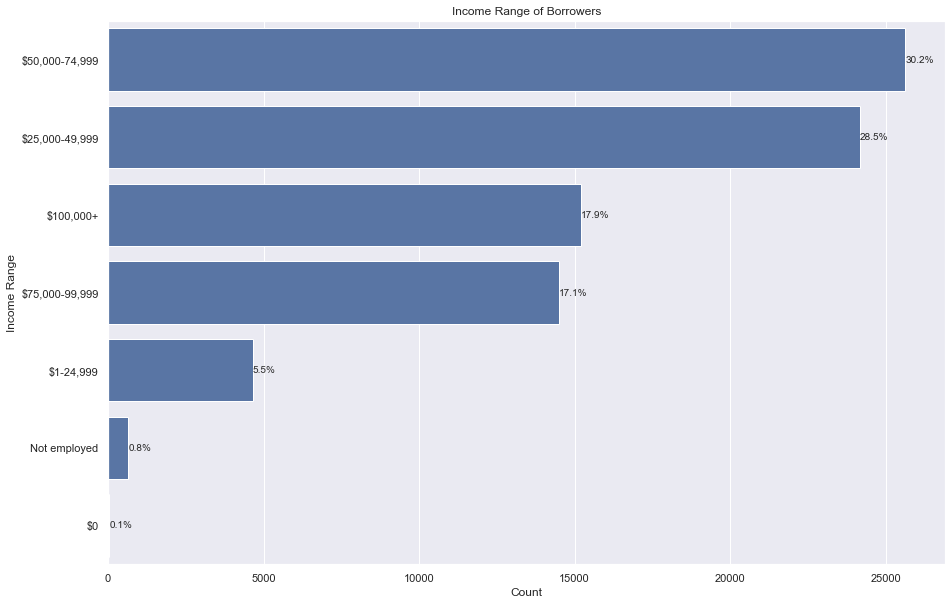

In [92]:
plt.figure(figsize=[15, 10])
status_order = loan_analysis_df['IncomeRange'].value_counts().index
sb.countplot(data=loan_analysis_df, y='IncomeRange', color=base_color, order=status_order);

# Returns the sum of all not-null values in `IncomeRange` column
income_range_count = loan_analysis_df['IncomeRange'].value_counts().sum()

# Count the frequency of unique values in the `IncomeRange` column of loan_analysis_df dataframe.
max_income_range_count = loan_analysis_df['IncomeRange'].value_counts()

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_income_range_prop = max_income_range_count/income_range_count

# Logic to print the proportion text on the bars
for i in range(max_income_range_count.shape[0]):
    count = max_income_range_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count/income_range_count)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va='center')

plt.xlabel('Count');
plt.ylabel('Income Range');
plt.title('Income Range of Borrowers');

#### Note:
The income range for the majority of the borrowers falls under \\$50,000 - \\$74,999 which is 30.2% of the total income range. Its then followed by \\$25,000 - \\$49,999 at 28.5%. At the higher end of the income range scale 35% of the borrowers have incomes ranging from \\$75,000 - \\$100,000+.

=========================================================================================================================

#### 3. Loan Term (Duration of term for loans)

In [93]:
loan_analysis_df['Term'].value_counts()

36    58678
60    24543
12     1613
Name: Term, dtype: int64

In [94]:
def bar_chart_loan_term():
    base_color = sb.color_palette()[0]
    sb.countplot(data=loan_analysis_df, x='Term', color=base_color)

bar_chart_loan_term()

#### Note:
A significant tenure of loans runs between 12 - 60 months. The most common being the 36 term loan followed by the 60
term term loan. Its also noted that the short term loan is quite significantly low.

================================================================================================================================

#### 4. Debt To IncomeRatio

In [95]:
loan_analysis_df['DebtToIncomeRatio'].value_counts()

0.258752    7291
0.180000    3212
0.220000    2999
0.170000    2749
0.140000    2703
            ... 
1.540000       1
3.810000       1
4.540000       1
1.930000       1
2.530000       1
Name: DebtToIncomeRatio, Length: 260, dtype: int64

In [96]:
loan_analysis_df['DebtToIncomeRatio'].describe()

count    84834.000000
mean         0.258740
std          0.304359
min          0.000000
25%          0.160000
50%          0.240000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

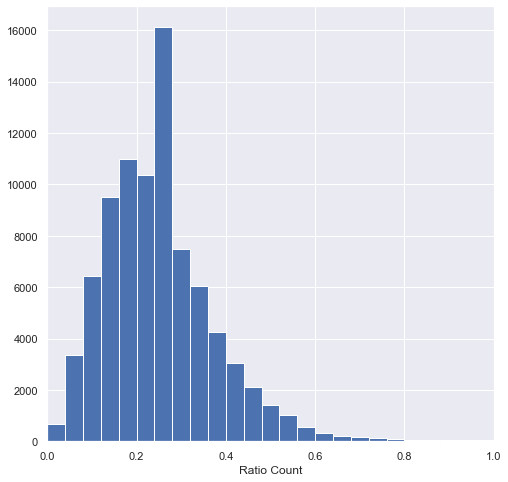

In [97]:
# start with a standard-scaled plot
binsize = 0.04
bins = np.arange(0, loan_analysis_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = loan_analysis_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Ratio Count')
plt.xlim([0,1.0])
plt.show()

#### Note:
A debt to income ratio compares how much you owe each month to how much you earn. A high debt income ratio poses
challenges in servicing the loan payments in the long term. Posing a higher risk of default.

================================================================================================================================

#### 5. Borrower APR distribution

In [98]:
loan_analysis_df['BorrowerAPR'].describe()

count    84834.000000
mean         0.226655
std          0.079917
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

In [99]:
binsize = 0.01
bins = np.arange(0, loan_analysis_df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = loan_analysis_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
#plt.xlim([0,1.0])
plt.show()

The distribution of the Borrower APR looks multimodal with multiple peaks. Significant peaks are clustered at 0.1, 0.2, 0.3

===================================================================================================================

#### 6. What is the distribution of the Borrowers Original Loan Amount?

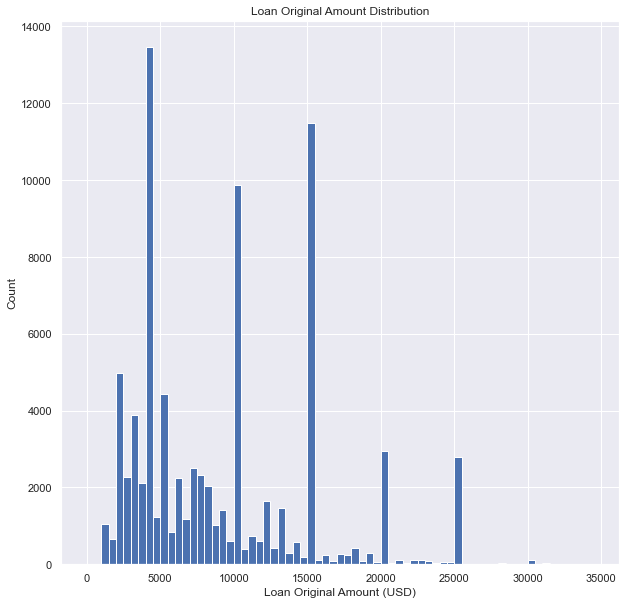

In [100]:
# Stated Loan Original Amount on a standard scale
plt.figure(figsize=[10, 10])

bins = np.arange(0, loan_analysis_df['LoanOriginalAmount'].max(), 500)
plt.hist(data = loan_analysis_df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('Count')
plt.show()

From the plot it can be clarly seeen that the distribution is right skewed bias. Will further invesigate this a log
scale.

In [101]:
np.log10(loan_analysis_df['LoanOriginalAmount'].describe())

count    4.928570
mean     3.958274
std      3.798490
min      3.000000
25%      3.602060
50%      3.875061
75%      4.130334
max      4.544068
Name: LoanOriginalAmount, dtype: float64

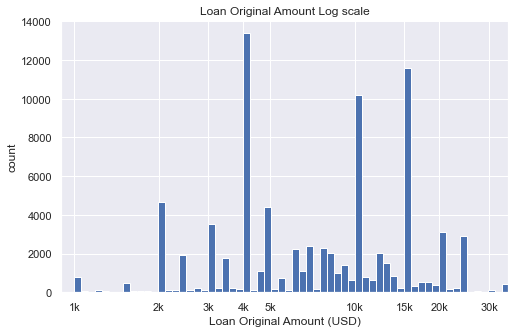

In [102]:
# Loan Original Amount Log Scale Plot
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loan_analysis_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_analysis_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.title('Loan Original Amount Log scale')
plt.xticks([500, 1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 3e4, 5e4],
           [500, '1k', '2k','3k', '4k', '5k', '10k', '15k', '20k', '30k', '50k'])
plt.xlabel('Loan Original Amount (USD)')
plt.xlim(900, 35000)
plt.ylabel('count')
plt.show()

The distribution seems to be multimodal with multiple peaks. Significant peaks being at 4000, 10,000, and 15,000

===========================================================================================================

#### 7. Distribution of ordinal variables.

In [103]:
loan_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanStatus                  84834 non-null  object        
 1   EmploymentStatus            84834 non-null  category      
 2   StatedMonthlyIncome         84834 non-null  float64       
 3   LoanOriginalAmount          84834 non-null  int64         
 4   Term                        84834 non-null  int64         
 5   Occupation                  84834 non-null  object        
 6   IsBorrowerHomeowner         84834 non-null  bool          
 7   CurrentCreditLines          84834 non-null  float64       
 8   DebtToIncomeRatio           84834 non-null  float64       
 9   IncomeRange                 84834 non-null  category      
 10  IncomeVerifiable            84834 non-null  bool          
 11  LoanOriginationDate         84834 non-null  datetime6

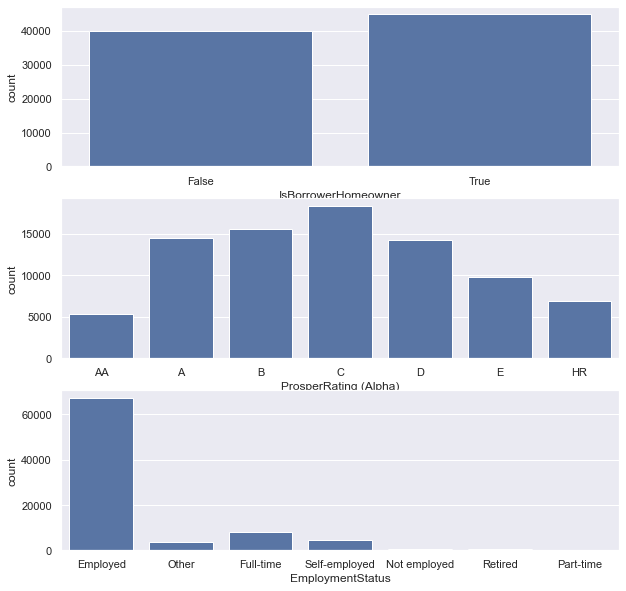

In [104]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
sb.countplot(data = loan_analysis_df, x = 'IsBorrowerHomeowner', color = base_color, ax = ax[0])
sb.countplot(data = loan_analysis_df, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[1])
sb.countplot(data = loan_analysis_df, x = 'EmploymentStatus', color = base_color, ax = ax[2]);
#plt.xticks(rotation=90);


======================================================================================================================

In [105]:
loan_analysis_df['Occupation'].unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Unknown', 'Teacher', 'Clergy', 'Attorney',
       'Nurse (RN)', 'Accountant/CPA', 'Analyst', 'Investor',
       'Flight Attendant', 'Nurse (LPN)', 'Military Officer',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Reli

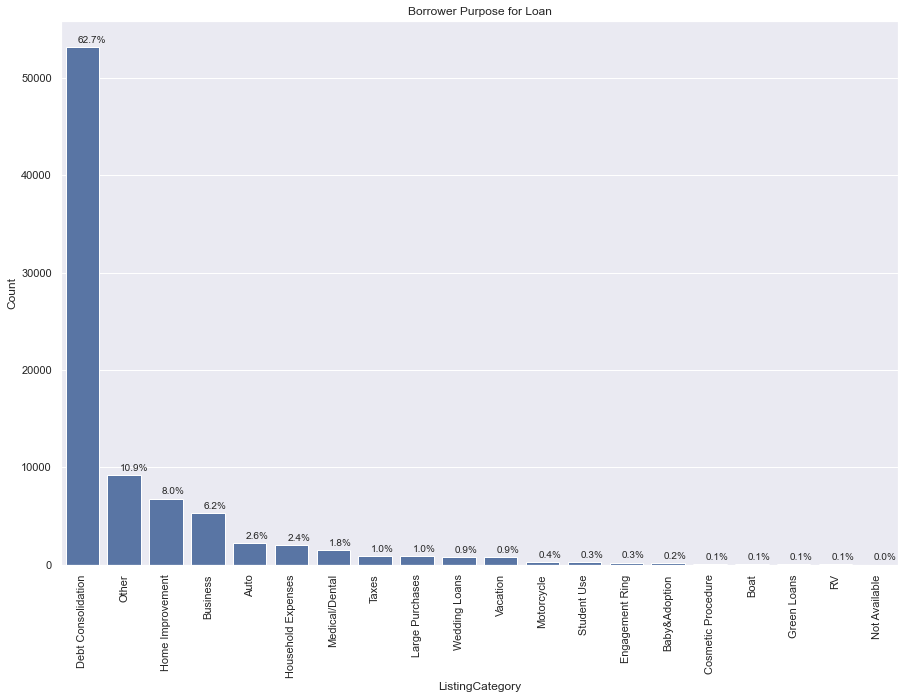

In [106]:
# loan purpose by category
plt.figure(figsize=[15,10])
category_listing_order = loan_analysis_df['ListingCategory'].value_counts().index
listing_counts = loan_analysis_df['ListingCategory'].value_counts()
sb.countplot(data = loan_analysis_df, x = 'ListingCategory', color = base_color, order=category_listing_order)
plt.ylabel('Count');
plt.title('Borrower Purpose for Loan')
plt.xticks(rotation = 90)

rating_counts = loan_analysis_df['ListingCategory'].value_counts()
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/loan_count)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

#### Note:
Its observed that 62.7% of the loan application listing goes to the reservicing of pre-existing loans i.e Debt consolidation.

================================================================================================================================

Text(0.5, 1.0, 'State with the highest Borrowers')

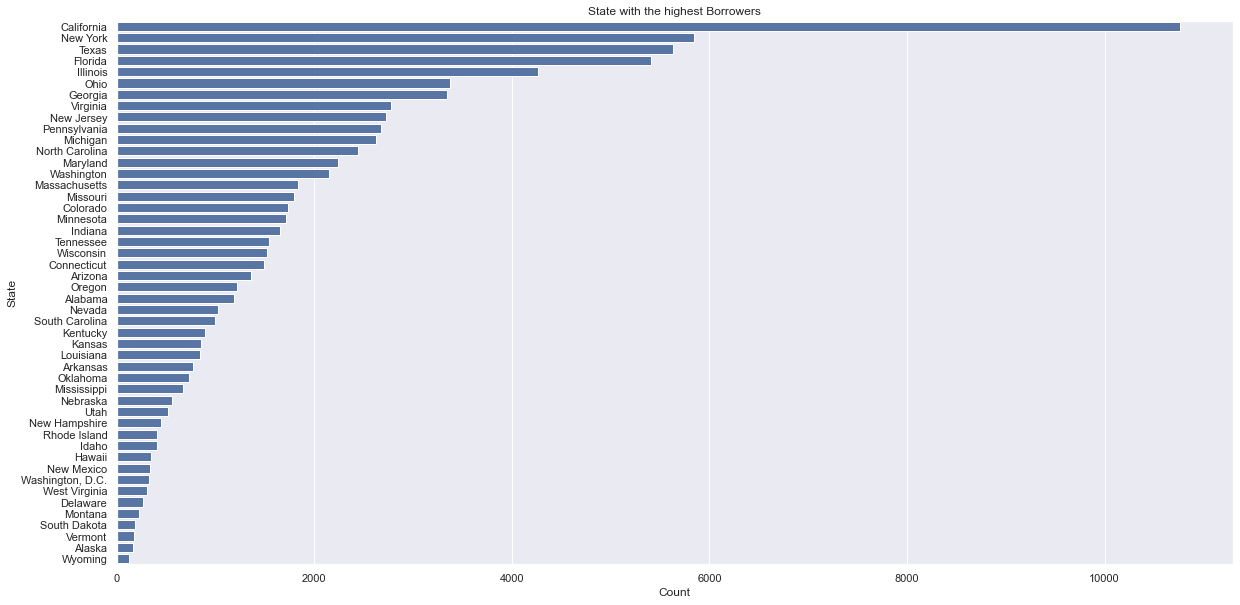

In [107]:
plt.figure(figsize=[20,10])
base_color = sb.color_palette()[0]
sb.countplot(data=loan_analysis_df, y='BorrowerState_Alpha', color=base_color)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('State with the highest Borrowers')

> California has the largest distribution of borrowers with loans.

===============================================================================================================================

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
 > Original Loan Amount: From the plot it can be clearly seen that the distribution is rightly skewed bias. A further invesigation was necessitated via the use of a logscale. The logscale distribution seems to be multimodal with multiple peaks. Significant peaks being at 4000, 10,000, and 15,000

> Under BorrowerState plot California had the Largest distribution of loan borrowed than any other state.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Grouped variables to categorical type. These varibles included ProsperRating (Alpha), IncomeRange, Occupation, BorrowerState, EmploymentStatus. These were often nominal values of pure labels without any inherent order.

> Remmapped Key Value Pairs. The BorrowerState data initially consisted of American States that were respectively abbreviated changed the data to represent there fullnames which offered a better visualization for say people who ain't familiar with abbreviated names of US states.
>

===============================================================================================================================

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

In [108]:
loan_analysis_df.sample(20)

LoanStatus EmploymentStatus  StatedMonthlyIncome  LoanOriginalAmount  \
5165       Current         Employed          4333.333333                5000   
69796      Current         Employed         17083.333333                5000   
109578     Current         Employed          8333.333333               15000   
60615      Current         Employed          5250.000000                4000   
82776      Current         Employed          4583.333333                9000   
11288      Current            Other          1750.000000                4000   
111180     Current         Employed          5833.333333                2000   
3619       Current         Employed          2714.750000                9000   
83698      Current         Employed          5833.333333               10000   
24310      Current          Retired          4750.000000                4000   
62688      Current    Self-employed          6666.666667               14000   
14856      Current         Employed          7666.666667                8000   
108050     Current         Employed          3333.333333               10000   
87435   Chargedoff    Self-employed          7436.083333                3700   
101894   Completed         Employed          5833.333333               10000   
80821    Completed        Full-time          8583.333333                9000   
25822      Current         Employed          8750.000000               19000   
111159     Current         Employed          8750.000000               17500   
65073      Current         Employed          8333.333333               30000   
15550      Current         Employed          8333.333333                4000   

        Term                Occupation  IsBorrowerHomeowner  \
5165      60  Administrative Assistant                False   
69796     36        Sales - Commission                False   
109578    60                     Other                 True   
60615     60         Military Enlisted                False   
82776     60                Nurse (RN)                 True   
11288     36                   Unknown                False   
111180    36             Skilled Labor                False   
3619      36  Administrative Assistant                False   
83698     60                   Teacher                False   
24310     36                     Other                 True   
62688     60                    Doctor                False   
14856     36                     Other                 True   
108050    36                   Analyst                False   
87435     36         Retail Management                 True   
101894    36         Military Enlisted                 True   
80821     36       Computer Programmer                 True   
25822     36      Tradesman - Mechanic                 True   
111159    36                 Executive                 True   
65073     36       Computer Programmer                False   
15550     36       Computer Programmer                 True   

        CurrentCreditLines  DebtToIncomeRatio     IncomeRange  \
5165                   8.0           0.130000  $50,000-74,999   
69796                 10.0           0.090000       $100,000+   
109578                 8.0           0.190000       $100,000+   
60615                 14.0           0.300000  $50,000-74,999   
82776                 17.0           0.440000  $50,000-74,999   
11288                  8.0           0.200000       $1-24,999   
111180                 8.0           0.110000  $50,000-74,999   
3619                   9.0           0.510000  $25,000-49,999   
83698                  9.0           0.420000  $50,000-74,999   
24310                 13.0           0.258752  $50,000-74,999   
62688                  6.0           0.258752  $75,000-99,999   
14856                  9.0           0.090000  $75,000-99,999   
108050                 7.0           0.280000  $25,000-49,999   
87435                 11.0           0.258752  $75,000-99,999   
101894                 4.0  

In [109]:
loan_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanStatus                  84834 non-null  object        
 1   EmploymentStatus            84834 non-null  category      
 2   StatedMonthlyIncome         84834 non-null  float64       
 3   LoanOriginalAmount          84834 non-null  int64         
 4   Term                        84834 non-null  int64         
 5   Occupation                  84834 non-null  object        
 6   IsBorrowerHomeowner         84834 non-null  bool          
 7   CurrentCreditLines          84834 non-null  float64       
 8   DebtToIncomeRatio           84834 non-null  float64       
 9   IncomeRange                 84834 non-null  category      
 10  IncomeVerifiable            84834 non-null  bool          
 11  LoanOriginationDate         84834 non-null  datetime6

#### To start off with, I want to look at the pairwise correlations present between features in the data.

#### 1. Quantitative Vs. Quantitative.

In [110]:
# Numeric and category list definition
numeric_vars = ['Term', 'BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'Occupation', 'IncomeRange', 'BorrowerState_Alpha', 'ListingCategory']

<AxesSubplot:>

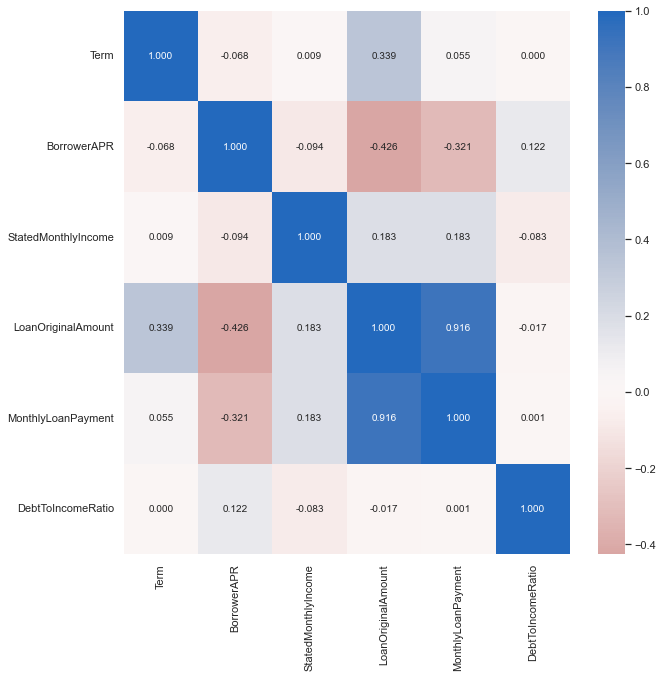

In [111]:
# Correlation matrix
plt.figure(figsize =[10,10])
sb.heatmap(loan_analysis_df[numeric_vars].corr(), annot = True, fmt='.3f', cmap='vlag_r', center=0)

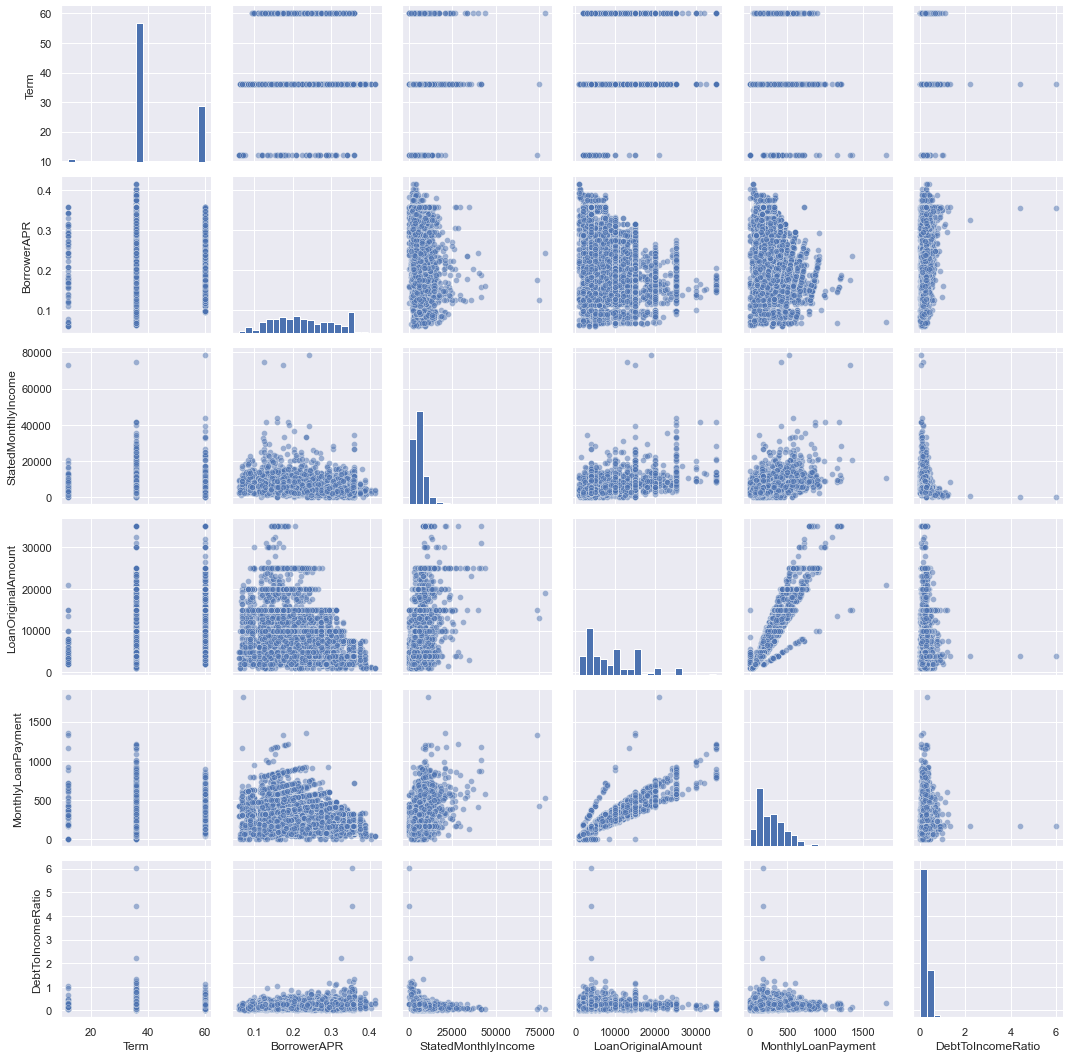

In [112]:
loan_analysis_df_samp = loan_analysis_df.sample(n=5000, replace=False)

g = sb.PairGrid(data = loan_analysis_df_samp, vars = numeric_vars, )
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.scatterplot, alpha = 0.5)


#### Note:
 - The stated monthly payment  and original loan amount are highly correlated with one another. Since monthly loan payment goes into reducing the original loan amount. There relationship wil always affect each other.
  - Loan term and original loan amount have a correlation with each other albeit not as strong.
  - The borrower APR and the original loan amount are negatively correlated, meaning that the higher the loan, the lower the APR.
  - All other correlation are extremely low or nonexistent.

===============================================================================================================

#### 2. Quantitative vs Qualitative

<Figure size 1440x720 with 0 Axes>

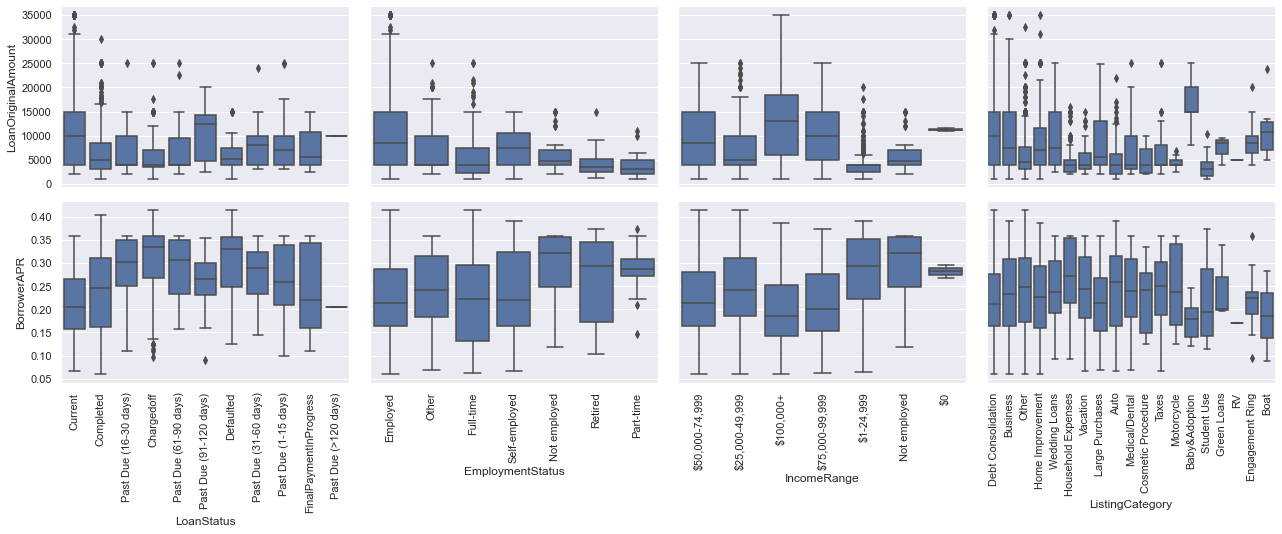

In [113]:
# Plotting Boxplot for numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x=x, y=y, color = base_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = loan_analysis_df_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeRange', 'ListingCategory'] ,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

#### Note:
- On Borrower APR vs Employment status box plot we notice that Employed people have lower Inter Quartile Range than any other group in the employment status.
 - On Borrower APR vs Loan status, Final payment in progress has the lowest Inter Quartile Range


==================================================================================================================

#### 3. Qualitative vs Qualitative

#### Relationship between categorical variables

Text(0.5, 1.0, 'Income Range vs Employment Status')

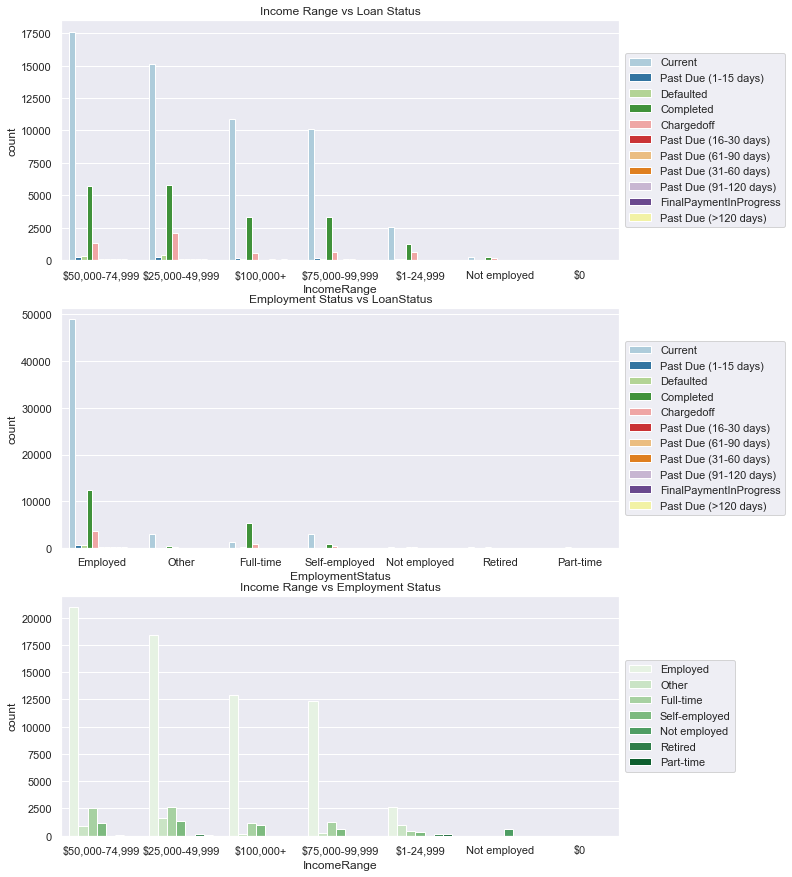

In [114]:
plt.figure(figsize = [10, 15])

#subplot 1: IncomeRange vs LoanStatus
plt.subplot(3, 1, 1)
sb.countplot(data = loan_analysis_df, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Paired')
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.title('Income Range vs Loan Status')

#subplot 2: Employment Status vs Loan Status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_analysis_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Paired')
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.title('Employment Status vs LoanStatus')

#subplot 3: Income Range vs Employment Status
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_analysis_df, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Greens')
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.title('Income Range vs Employment Status')


#### Note:

 - In the Income Range vs Loan Status plot -- Employed borrowers get larger amounts of loans as compared to any other group. Self employed get larger loans compared to borrowers that are employed full time. And note: the larger the loan the most likely to have a decrease in APR.

 - Employment status vs Loan Status plot -- Employed borrowers have the highest current active loans as well they also lead with the highest completed loans. The latter decrease as shown by the plot.
 
  - Income Range vs Employment Status plot -- Employed and full time have the highest income range compared to the other grouping 

================================================================================================================

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR.
> The stated monthly payment  and original loan amount are highly correlated with one another. Since monthly loan payment goes into reducing the original loan amount. There relationship wil always affect each other.
> All other correlation are extremely low or nonexistent.
> Employed Borrowers have the highest count of loans for Income Ranges of between \\$50000- \\$74,999 and they also have the highest amount of current loans that are active.


======================================================================================================================

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

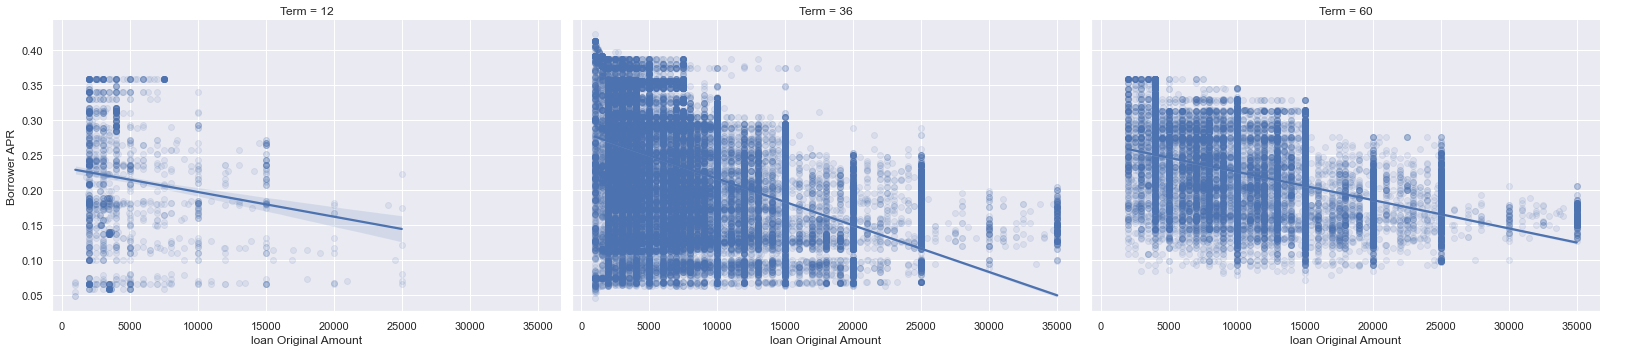

In [115]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_analysis_df, height=5, col='Term', col_wrap=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('loan Original Amount')
g.set_ylabels('Borrower APR')

#### Note:
Term doesn't seem to have any effect on the relationship between the loan amount and APR.

==========================================================================================================

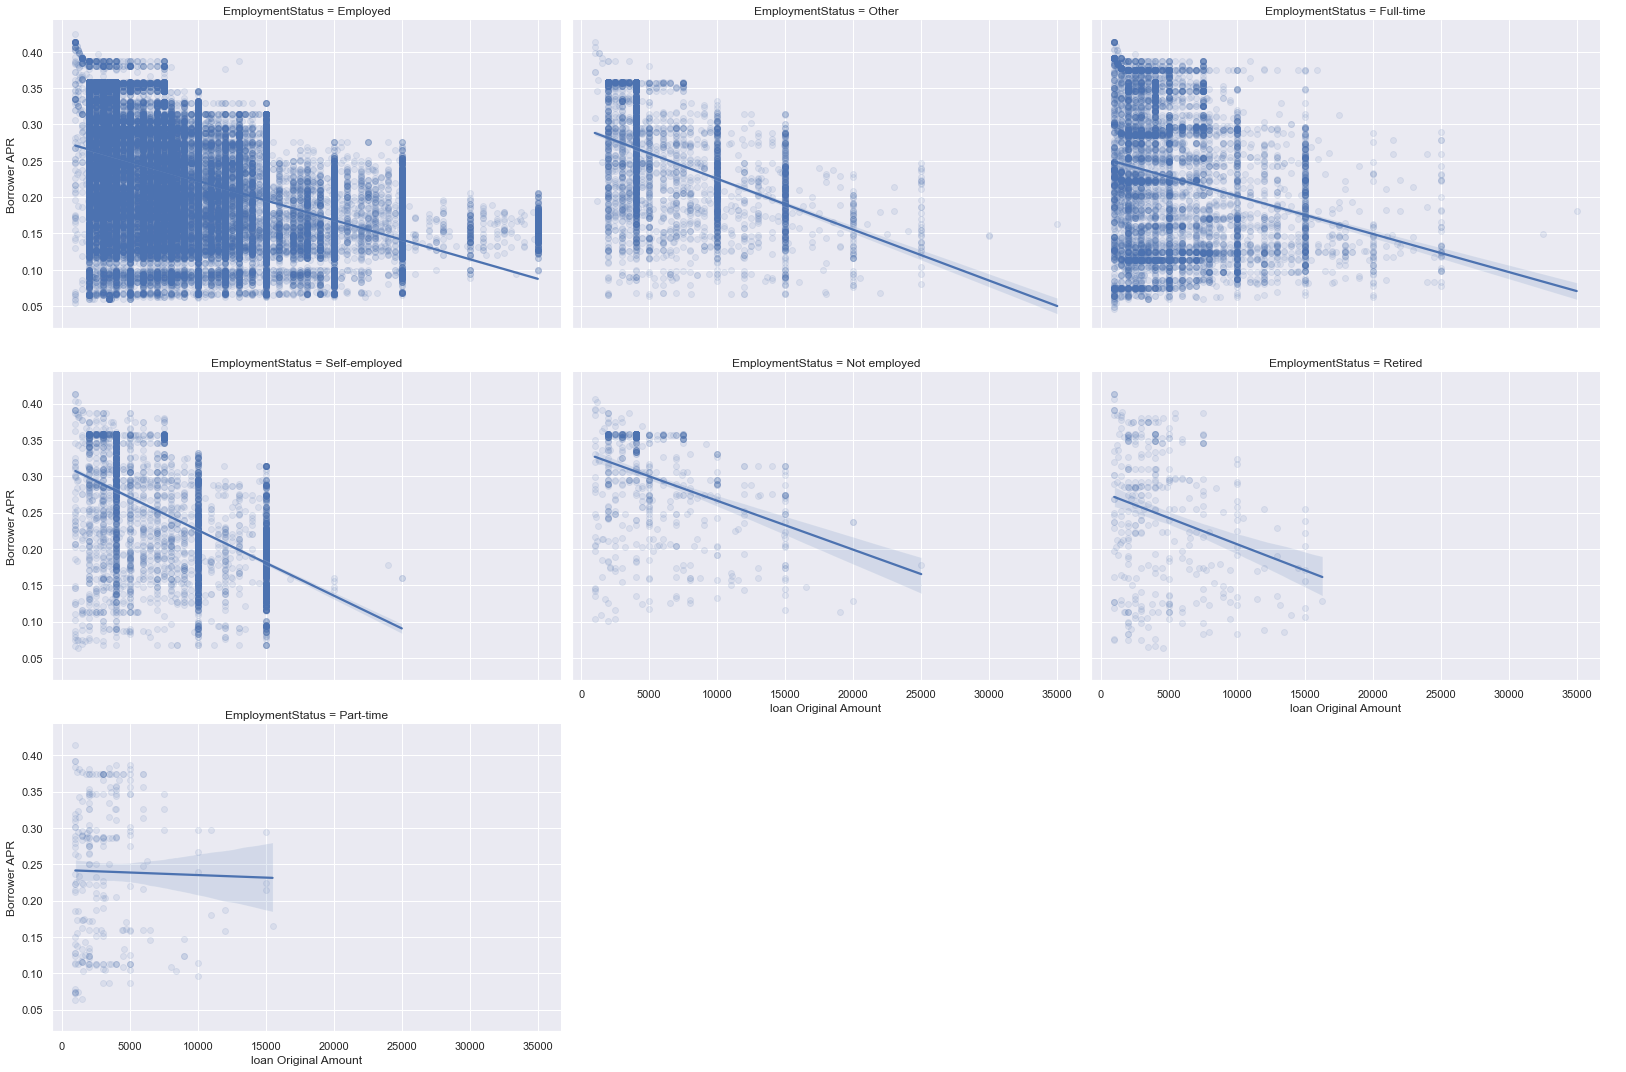

In [116]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_analysis_df, height=5, col='EmploymentStatus', col_wrap=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('loan Original Amount')
g.set_ylabels('Borrower APR')

At range size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of the loan amount. Its suffice to say, the borrower APR decrease with increase of loan amount.


=========================================================================================================================

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relation between EmploymentStatus, LoanStatus and BorrowerAPR:

 - We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.
 - Employees with Full-Time and part-time tend have a lower Borrower APR across all loan status categories. vice versa also holds true for borrowers who're Retired, Not-Employed, and the 'Other' category.
 - We do also observe that the APR reduces as the loan amount increases across the  various Employee status category

### Were there any interesting or surprising interactions between features?

> BorrowerAPR and the LoanOriginalAmount have a negative correlation. The higher is the loan amount,  APR tends to be less.
> Parttime Employees APR status reduces with a higher amount of loan taken but compared to the rest at a far slower rate.

## Conclusions
 - The higher the Loan amount the lower the Borrowers' APR will be. The lender are more likely to earn more from borrowers that borrow small amounts.
 - A borrower's employment status determine their original loan amounts given. Employed borrowers get larger amounts of loans as compared to any other group.
 - Stating your employment status as 'Other' reduces your chances of getting a large loan amount.
 - BorrowerAPR is not affected by term of the loan.
 - Borrowers with an income ranging from that falls between \\$20,000 - \\$74,999 take up half of the loan issued at  58.7% by Prosper.


============================================================================================================================
